In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


# a) Structural covariance

Structural covariance matrix:

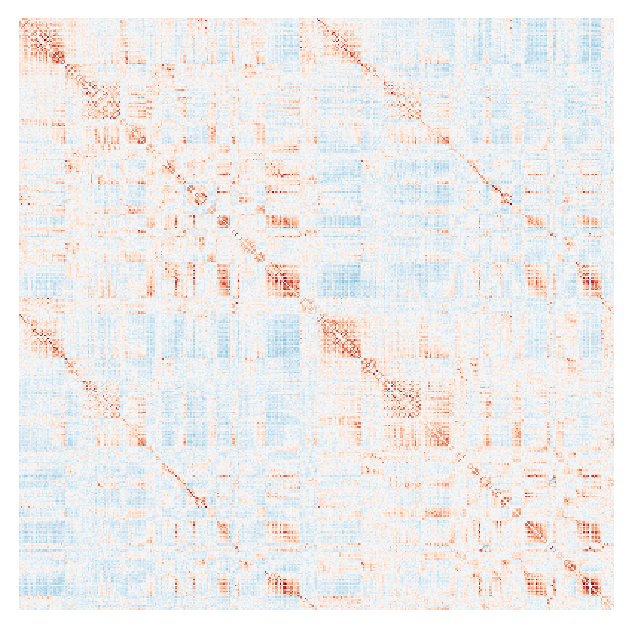

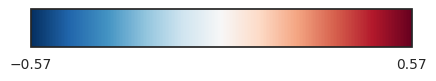

In [2]:
scov = matrices.StructuralCovarianceMatrix()
scov.plot(vrange='sym')

Correlation of LTC with structural covariance matrix:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Structural covariance
Coef: 0.3297162046912865; p-value (spin): 0.0


(0.3297162046912865, 0.0)

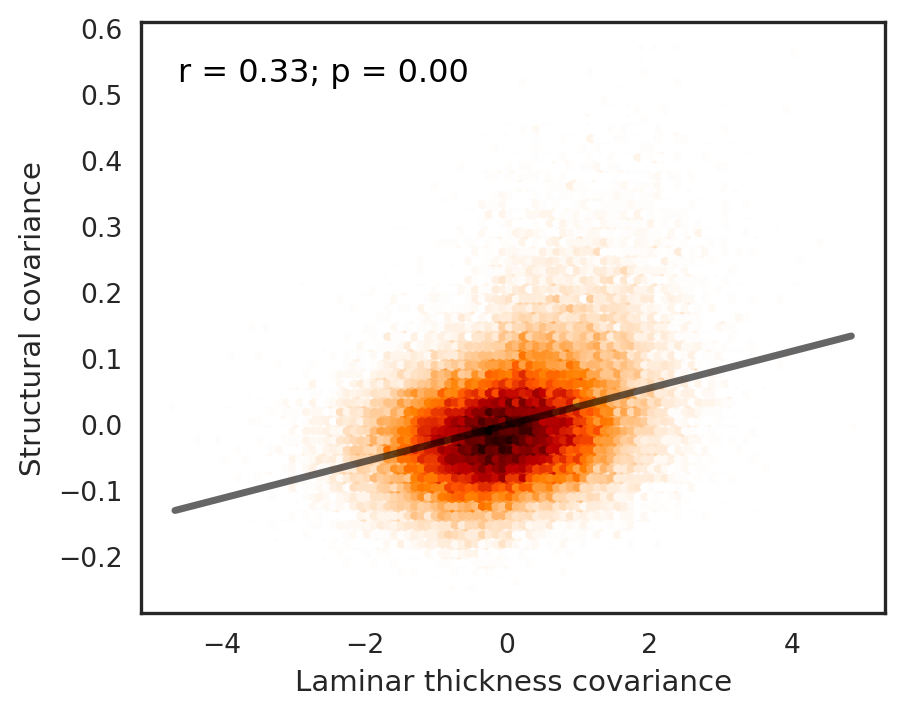

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
ltc.correlate_edge_wise(scov, n_perm=1000, axis_off=False, figsize=(5,4))

Principal gradient of structural covariance:

In [4]:
scovg = surfaces.Gradients(scov, n_components_report=1)

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


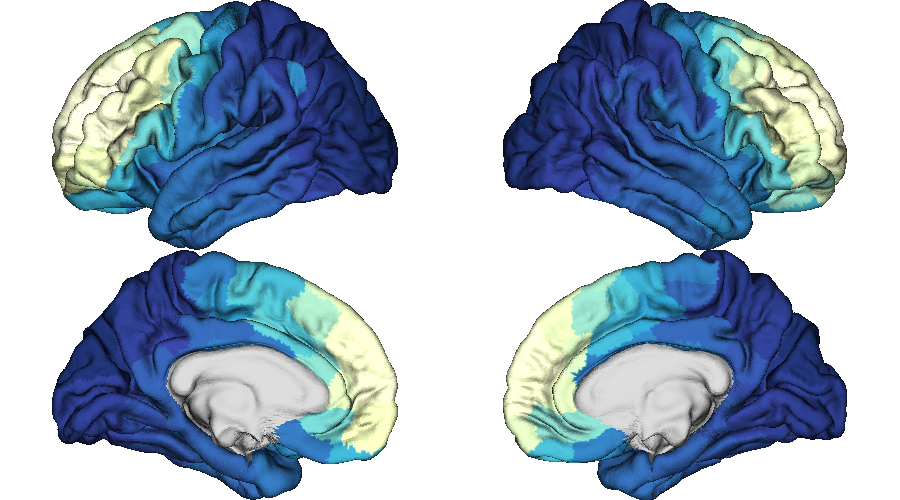

In [5]:
helpers.plot_surface(
    helpers.deparcellate(scovg.parcellated_data.iloc[:, 0], 'schaefer400', space='fsaverage'),
    cmap = 'YlGnBu_r', layout_style='grid', inflate=False,
    plot_downsampled=False, space='fsaverage'
)

Correlation of LTC G1 and the principal gradient of structrual covariance:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-359.npz and have the same parcels


(             LTC G1
 StrCov G1 -0.546048,
            LTC G1
 StrCov G1     0.0)

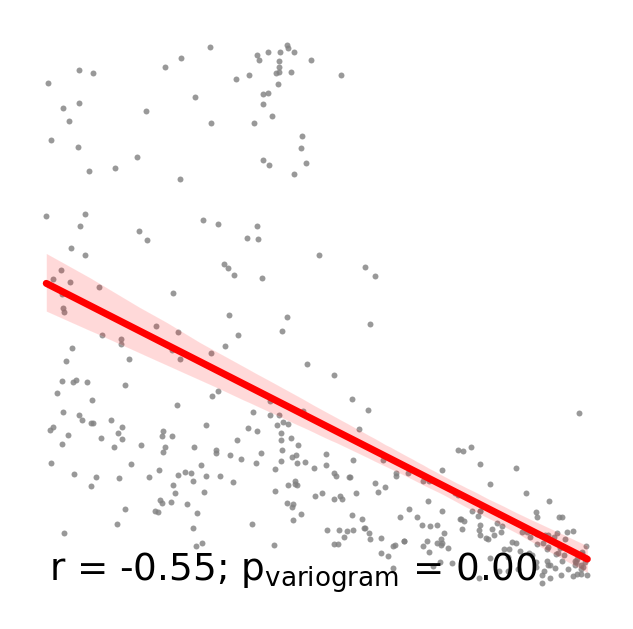

In [6]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
ltcg.correlate(scovg, x_columns=['LTC G1'], y_columns=['StrCov G1'], axis_off=True)

# b) Genetic and environmental correlations

Genetic correlation

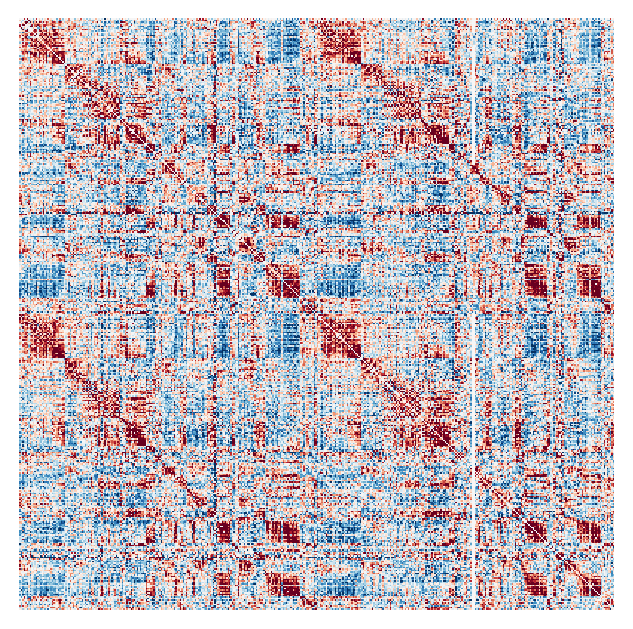

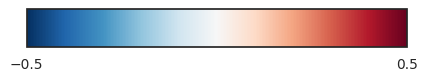

In [2]:
gene_corr = matrices.GeneticCorrelationMatrix()
helpers.plot_matrix(gene_corr.matrix.values, cmap=gene_corr.cmap, vrange_value=(-0.5, 0.5))

Correlation of LTC with structural covariance matrix:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Genetic correlation
Coef: 0.2983859326230832; p-value (spin): 0.0


(0.2983859326230832, 0.0)

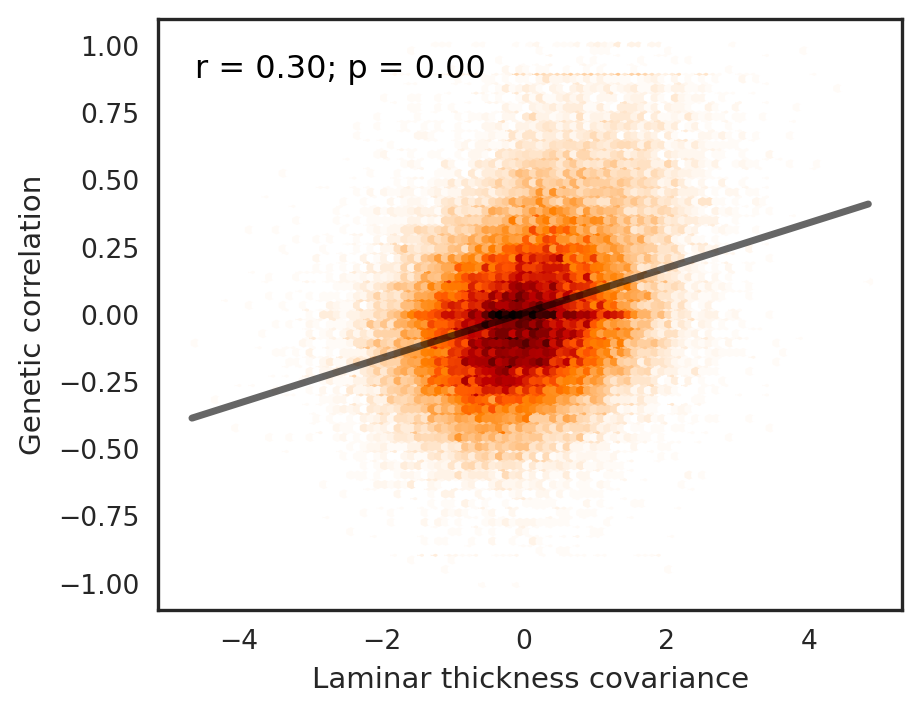

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
ltc.correlate_edge_wise(gene_corr, n_perm=1000, axis_off=False, figsize=(5,4))

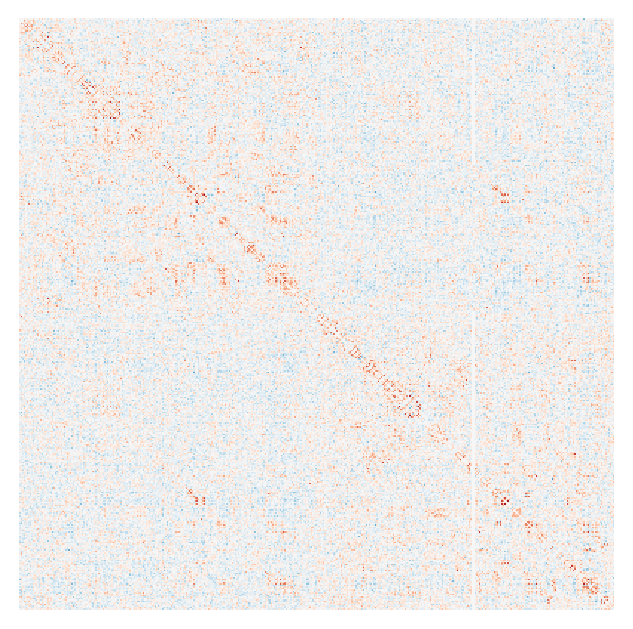

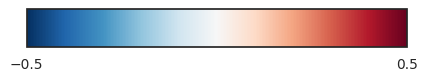

In [4]:
env_corr = matrices.EnvironmentalCorrelationMatrix()
helpers.plot_matrix(env_corr.matrix.values, cmap=env_corr.cmap, vrange_value=(-0.5, 0.5))

Pearson correlation with Environmental correlation
Coef: 0.11018145630285114; p-value (spin): 0.008


(0.11018145630285114, 0.008)

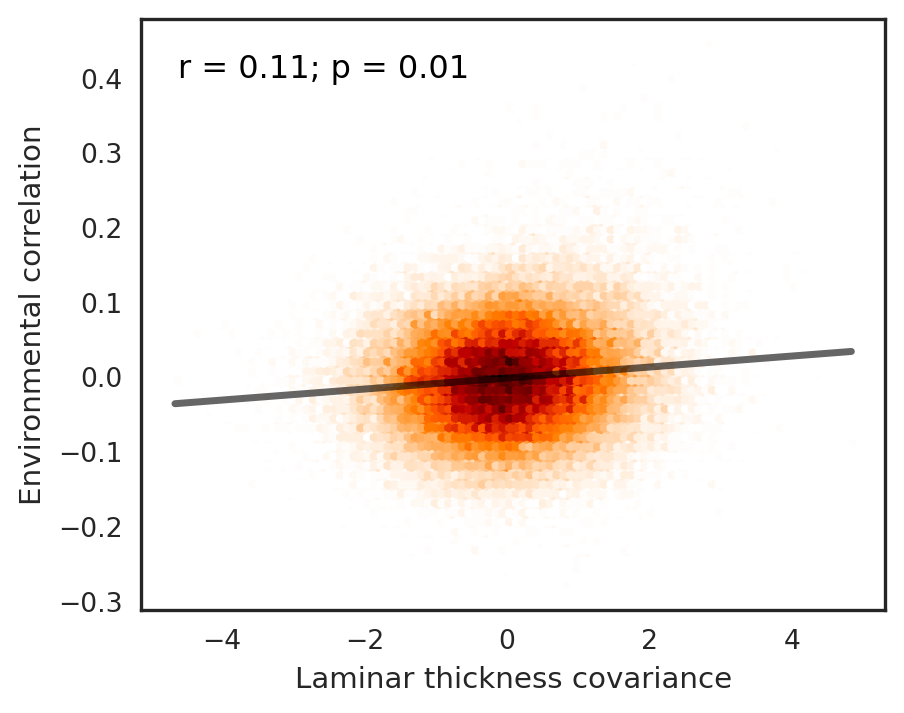

In [5]:
ltc.correlate_edge_wise(env_corr, n_perm=1000, axis_off=False, figsize=(5,4))

# c) Correlated gene expression

In [4]:
ahba_df = datasets.fetch_ahba_data(
    parcellation_name='schaefer400', 
    ibf_threshold=0.5, missing='centroids')['all']

(0.0, 200.0, 15631.0, 0.0)

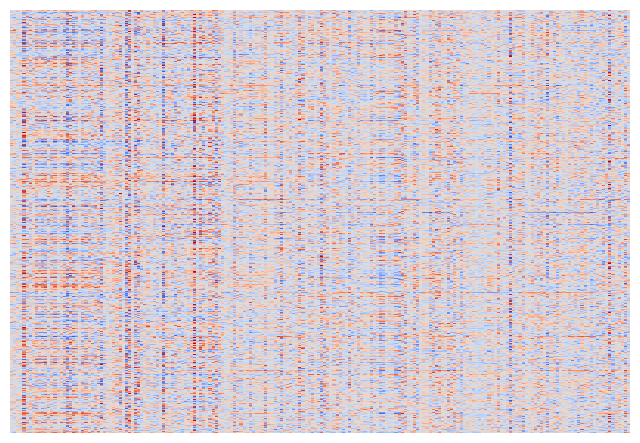

In [7]:
ax = sns.heatmap(ahba_df.values.T, cmap='coolwarm', cbar=False)
ax.axis('off')

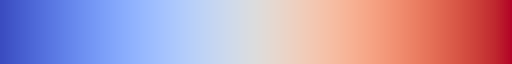

In [3]:
sns.color_palette('coolwarm', as_cmap=True)

CGE matrix:

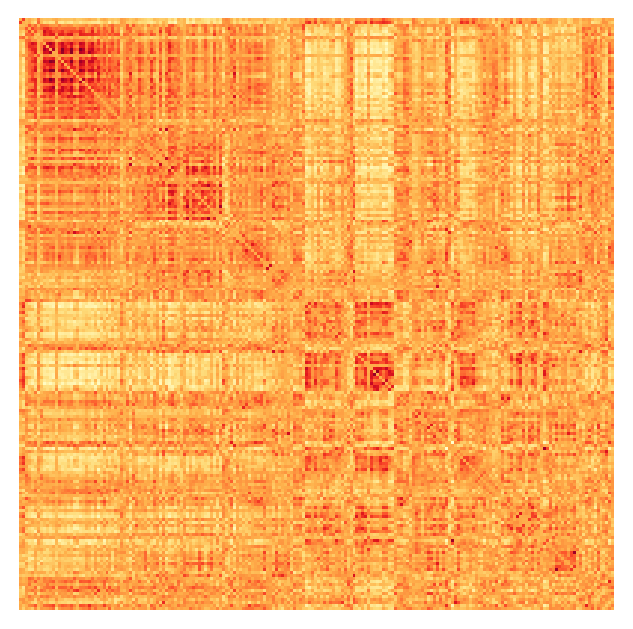

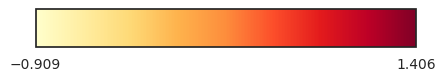

In [4]:
cge = matrices.CorrelatedGeneExpressionMatrix('schaefer400', brain_specific=False)
cge.plot(vrange=(0, 1))

Correlation of LTC with CGE:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Correlated gene expression
Coef: 0.24310923287751726; p-value (spin): 0.001


(0.24310923287751726, 0.001)

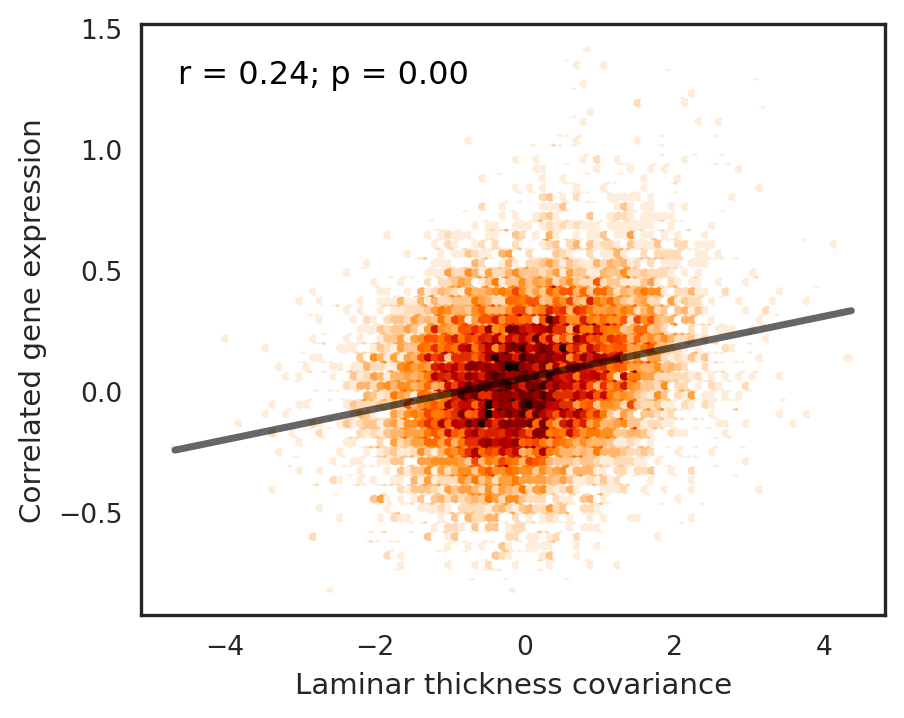

In [5]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
ltc.correlate_edge_wise(cge, axis_off=False, figsize=(5,4))